<a href="https://colab.research.google.com/github/An9ieKim/An9ieKim.github.io/blob/main/graph_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치


pycairo 설치시 에러가 발생하여 upgrade 진행

In [ ]:
!pip install --upgrade pip setuptools wheel

In [ ]:
!pip install rdkit-pypi
!pip install networkx
!pip install matplotlib
!pip install igraph
!pip install chart-studio
!pip install kaleido
!pip install pycairo

upgrade 해도 pycairo 설치시 에러 발생 -> 무시하고 진행

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolsToImage
from rdkit.Chem.Draw import MolToFile
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig
from chart_studio import plotly as py
import plotly.graph_objs as go
import numpy as np

# 데이터 읽기
mol_id_to_smiles.csv 업로드 필요함

In [ ]:
df = pd.read_csv('/content/mol_id_to_smiles.csv')

# smiles code read

In [ ]:
smiles = df['smiles'][1004]
smiles

'O=C1C2OC3CC2C13'

smiles코드로부터 분자정보 읽기

In [ ]:
mol = Chem.MolFromSmiles(smiles)


# RDKit으로 분자구조 그리기

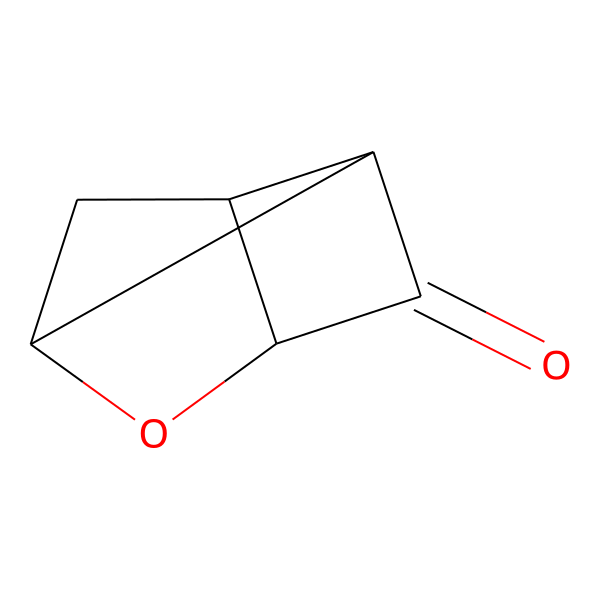

In [ ]:
MolsToImage(mols=[mol], subImgSize=(600,600))

# Networkx 로 분자구조 그리기

In [ ]:
G = nx.Graph()

for atom in mol.GetAtoms():
    G.add_node(atom.GetIdx(),
                labels=atom.GetSymbol(),
                atomic_num=atom.GetAtomicNum(),
                formal_charge=atom.GetFormalCharge(),
                chiral_tag=atom.GetChiralTag(),
                hybridization=atom.GetHybridization(),
                num_explicit_hs=atom.GetNumExplicitHs(),
                is_aromatic=atom.GetIsAromatic())
for bond in mol.GetBonds():
    G.add_edge(bond.GetBeginAtomIdx(),
                bond.GetEndAtomIdx(),
                bond_type=bond.GetBondType(),
                bond_type_value=bond.GetBondTypeAsDouble())


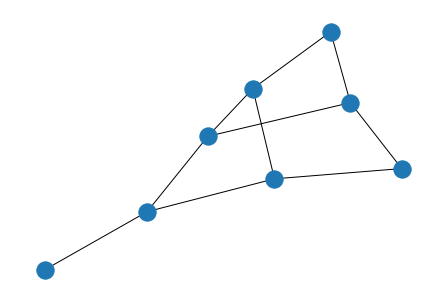

In [ ]:
nx.draw(G)

노드에 레이블 넣기

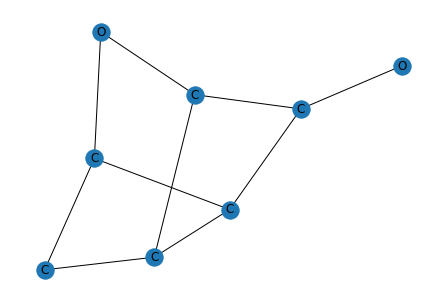

In [ ]:
nx.draw(G, pos=nx.kamada_kawai_layout(G),  labels={node: G.nodes()[node]['labels'] for node in G.nodes()})

노드 색상 변경 및 링크 레이블 추가

In [ ]:
nColors =[G.nodes()[node]['atomic_num'] for node in G.nodes()]
color_set = list(set(nColors))
nColors = [color_set.index(n) for n in nColors]

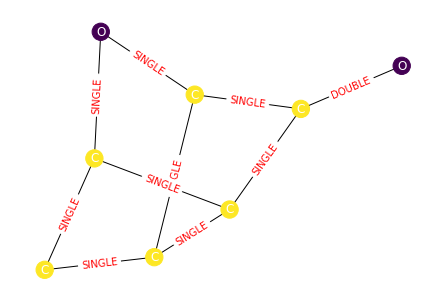

In [ ]:
plt.figure()
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_color=nColors, 
        labels={node: G.nodes()[node]['labels'] for node in G.nodes()},
       font_color='white')
nx.draw_networkx_edge_labels(
    G, pos=nx.kamada_kawai_layout(G),
    edge_labels=dict(((e[0], e[1]), f'{e[2]["bond_type"]}') for e in G.edges(data=True)),
    font_color='red'
)
plt.axis('off')
plt.show()

# iGraph로 분자구조 그리기

In [ ]:
N = len(G.nodes())
L = len(G.edges())
Edges = list(G.edges())

In [ ]:
IG=ig.Graph(Edges, directed=False)
    
labels=[]
group=[]
for node in G.nodes():
  labels.append(G.nodes()[node]['labels'])
  group.append(G.nodes()[node]['atomic_num'])


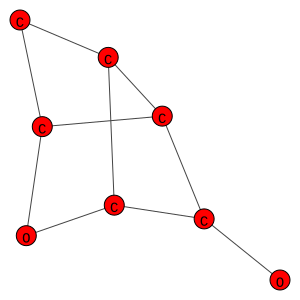

In [ ]:
layt = IG.layout('kk', dim=2)
ig.plot(IG, layout=layt, vertex_label=labels, bbox=(300,300))

# 3D로 그리기

In [ ]:
layt = IG.layout('kk', dim=3)

3차원으로 그리기 위한 좌표를 생성

In [ ]:
Xn=[layt[k][0] for k in range(N)]
Yn=[layt[k][1] for k in range(N)]
Zn=[layt[k][2] for k in range(N)]
Xe=[]
Ye=[]
Ze=[]

for e in Edges:
    Xe+=[[layt[e[0]][0],layt[e[1]][0], None]]
    Ye+=[[layt[e[0]][1],layt[e[1]][1], None]]
    Ze+=[[layt[e[0]][2],layt[e[1]][2], None]]


색상과 스타일을 적용

In [ ]:
traces = {}
line_style = {
    "SINGLE" : {"color":"gray", "width":2, "dash":"solid"},
    "AROMATIC" : {"color":"blue", "width":4, "dash":"longdashdot"},
    "DOUBLE" : {"color":"red", "width":5, "dash":"longdash"},
    
}
for i in range(0, len(Edges)):
    traces['trace_'+str(i)] = go.Scatter3d(x=Xe[i],
                                          y=Ye[i],
                                          z=Ze[i],
                                          mode='lines+text',
                                          hoverinfo='none'
                                          )

trace_node=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers+text',
               name='actors',
               marker=dict(symbol='circle',
                             size=6,
                             color=group,
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=labels,
               textposition='bottom center',
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         width=700,
         height=700,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
)


In [ ]:
traces_link = list(traces.values()) 
traces_link.append(trace_node) 

fig=go.Figure(data=traces_link, layout=layout)
fig


In [ ]:
import plotly.express as px

fig.write_html('plotly_graph.html')
